In [7]:
#load library
library(tidyverse)
library(dplyr)

Warning message:
“package ‘dplyr’ was built under R version 4.3.2”
Warning message:
“package ‘stringr’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [60]:
#loading data
original_data <- read.csv("data.csv", header=TRUE)
head(original_data)

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
,<chr>,<dbl>,<chr>,<int>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,Toronto,779900,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000
2,Toronto,799999,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000
3,Toronto,799900,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000
4,Toronto,1200000,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000
5,Toronto,668800,#420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000
6,Toronto,548000,#2503 -99 HARBOUR SQ,0,1,Ontario,5647656,43.7417,-79.3733,97000


In [61]:
nrow(original_data)

[1] 35768

In [62]:
#drop Address and City because the Latitude and Longitude variables are representing this information
data <- original_data %>% select(-c(Address, City))
head(data)
unique(data$Province)

,Price,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
,<dbl>,<int>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,779900,3,2,Ontario,5647656,43.7417,-79.3733,97000
2,799999,3,1,Ontario,5647656,43.7417,-79.3733,97000
3,799900,2,2,Ontario,5647656,43.7417,-79.3733,97000
4,1200000,4,2,Ontario,5647656,43.7417,-79.3733,97000
5,668800,1,1,Ontario,5647656,43.7417,-79.3733,97000
6,548000,0,1,Ontario,5647656,43.7417,-79.3733,97000


[1] "Ontario"                   "British Columbia"         
[3] "Alberta"                   "Manitoba"                 
[5] "Saskatchewan"              "Newfoundland and Labrador"
[7] "New Brunswick"             "Quebec"                   
[9] "Nova Scotia"

In [63]:
# There are 9 provinces in the dataset. 
#To reduce the level of provinces, we group some provinces into larger regions as shown below:
# Atlantic - New Brunswick, Nova Scotia, Newfoundland and Labrador
# Prairies - Alberta, Saskatchewan, Manitoba
data$Province[data$Province %in% c("Nova Scotia", "New Brunswick", "Newfoundland and Labrador")] <- "Atlantic"
data$Province[data$Province %in% c("Alberta", "Saskatchewan", "Manitoba")] <- "Prairies"

In [65]:
names(data)[names(data) == "Province"] <- "Region"
data$Region <- factor(data$Region)
head(data)
unique(data$Region)

,Price,Number_Beds,Number_Baths,Region,Population,Latitude,Longitude,Median_Family_Income
,<dbl>,<int>,<int>,<fct>,<int>,<dbl>,<dbl>,<dbl>
1,779900,3,2,Ontario,5647656,43.7417,-79.3733,97000
2,799999,3,1,Ontario,5647656,43.7417,-79.3733,97000
3,799900,2,2,Ontario,5647656,43.7417,-79.3733,97000
4,1200000,4,2,Ontario,5647656,43.7417,-79.3733,97000
5,668800,1,1,Ontario,5647656,43.7417,-79.3733,97000
6,548000,0,1,Ontario,5647656,43.7417,-79.3733,97000


[1] Ontario          British Columbia Prairies         Atlantic        
[5] Quebec          
Levels: Atlantic British Columbia Ontario Prairies Quebec

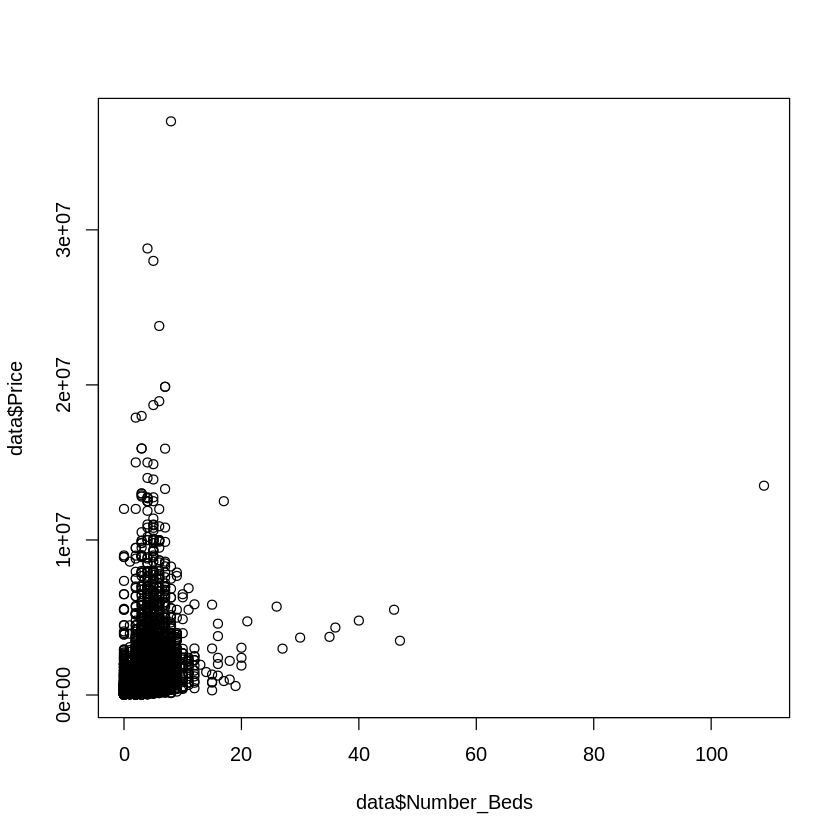

In [66]:
plot(data$Number_Beds, data$Price)

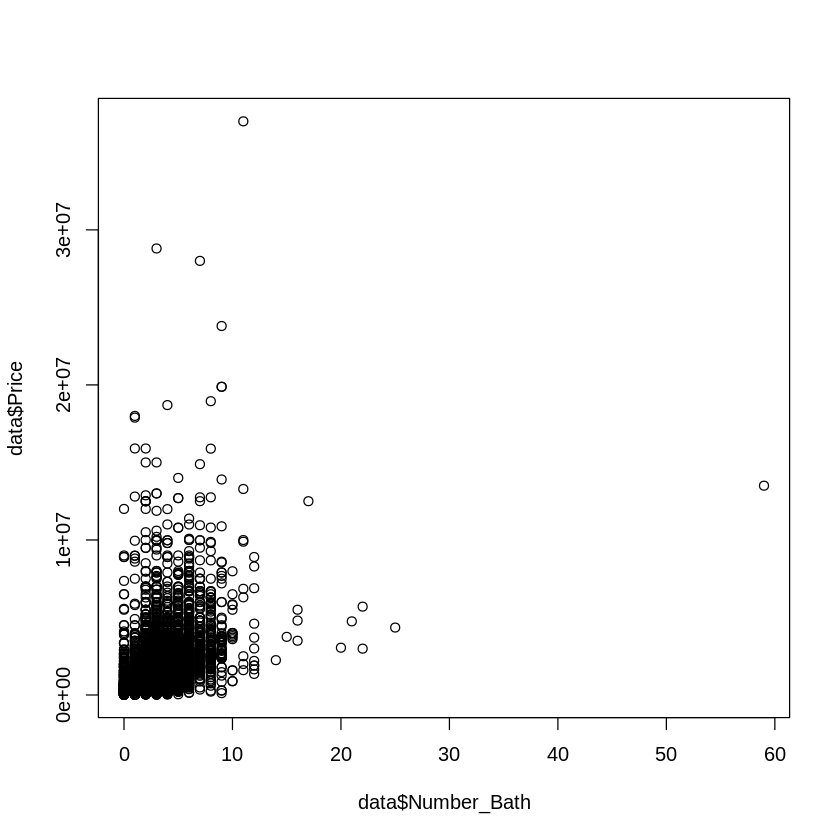

In [10]:
plot(data$Number_Bath, data$Price)

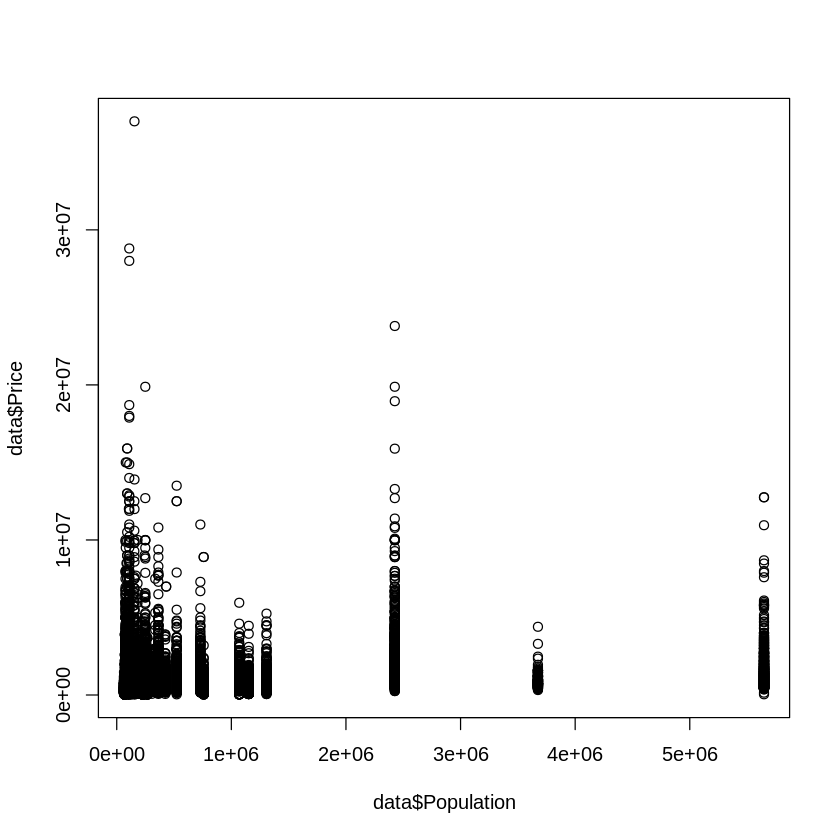

In [11]:
plot(data$Population, data$Price)

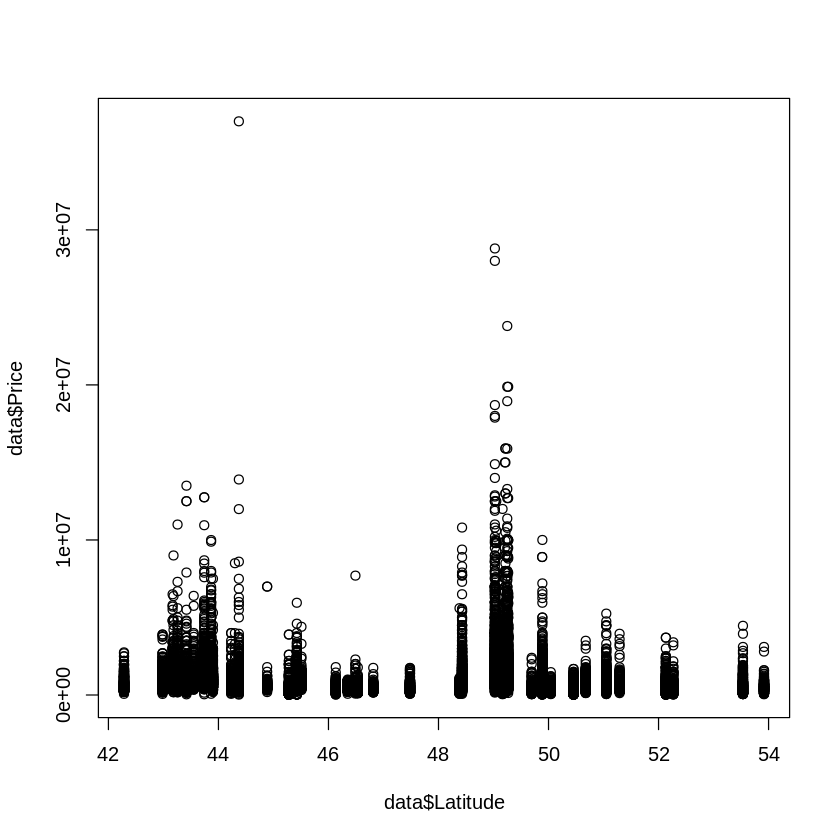

In [12]:
plot(data$Latitude, data$Price)

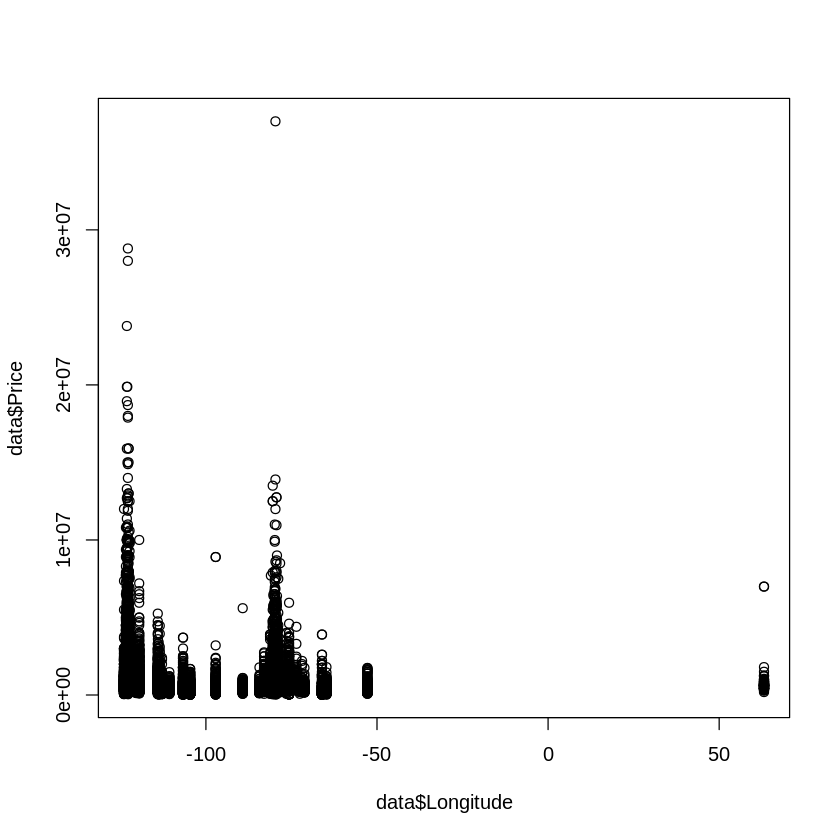

In [67]:
plot(data$Longitude, data$Price)

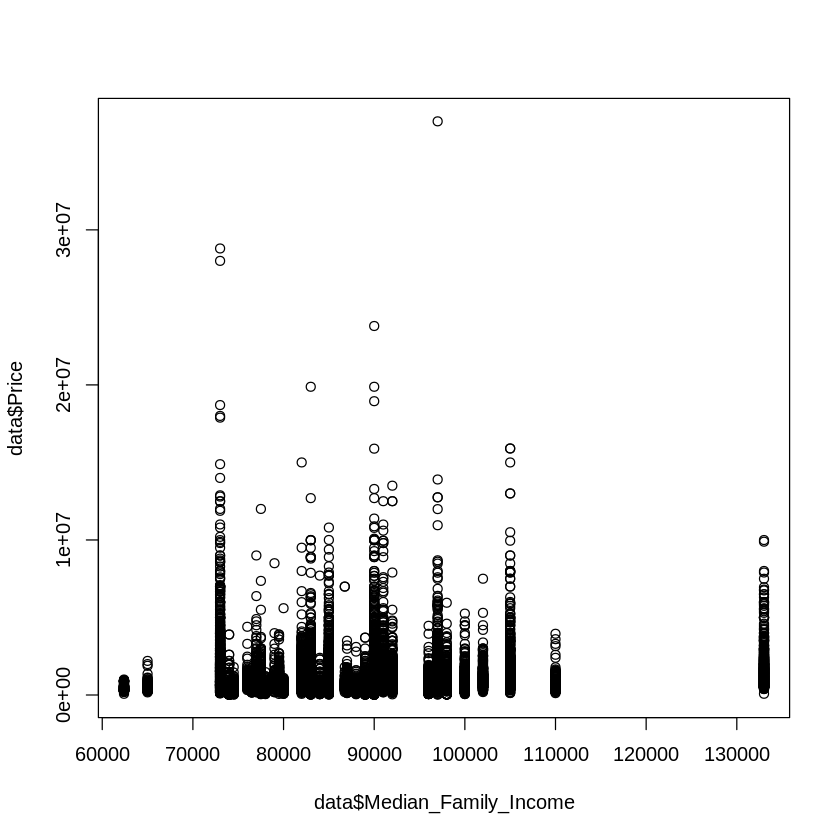

In [14]:
plot(data$Median_Family_Income, data$Price)

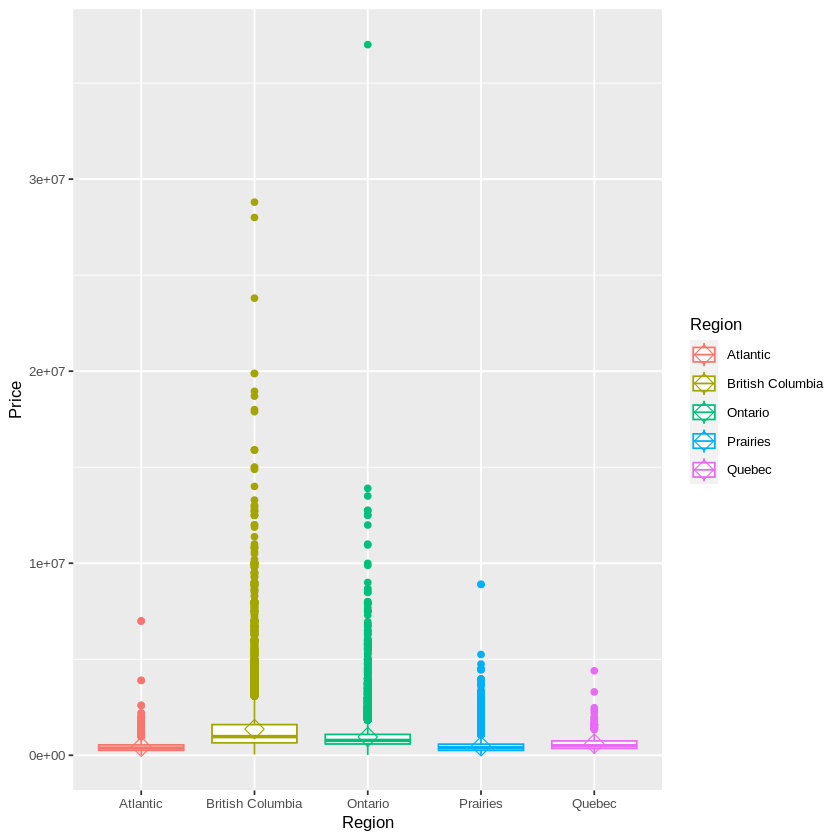

In [72]:
region <-ggplot(data, aes(x=Region, y=Price, color=Region)) +
  geom_boxplot() +
  xlab("Region") +
  ylab("Price") +
  theme(text = element_text(size = 10))+
  # Box plot with mean points
  stat_summary(fun.y=mean, geom="point", shape=23, size=4)
region

In [68]:
#full model
model <- lm(Price ~ Number_Beds*Number_Baths+Region+Population+Latitude*Longitude+Median_Family_Income,
            data=data)
summary(model)


Call:
lm(formula = Price ~ Number_Beds * Number_Baths + Region + Population + 
    Latitude * Longitude + Median_Family_Income, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-4137099  -331360   -99714   140445 33360344 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               4.776e+05  8.549e+05   0.559  0.57637    
Number_Beds               2.922e+04  4.120e+03   7.091 1.36e-12 ***
Number_Baths              3.300e+05  4.838e+03  68.208  < 2e-16 ***
RegionBritish Columbia    8.553e+05  5.365e+04  15.943  < 2e-16 ***
RegionOntario            -1.934e+04  3.428e+04  -0.564  0.57254    
RegionPrairies            1.175e+05  4.768e+04   2.465  0.01369 *  
RegionQuebec              1.253e+05  3.918e+04   3.199  0.00138 ** 
Population                1.178e-01  4.069e-03  28.954  < 2e-16 ***
Latitude                 -2.578e+04  1.861e+04  -1.385  0.16594    
Longitude                -2.288e+04  8.020e+03  -2.853  0.0